In [101]:
from patch_generator import smash_n_reconstruct
from matplotlib import pyplot as plt
import filters as f
import numpy as np
import cv2
from scipy.ndimage import rotate
import os
import gc

In [86]:
rt,pt = smash_n_reconstruct(input_path='./test_imgs/real.jpg')

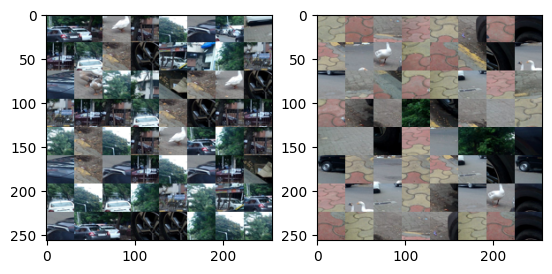

In [87]:
plt.subplot(1,2,1)
plt.imshow(rt,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pt,cmap='gray')
plt.show()

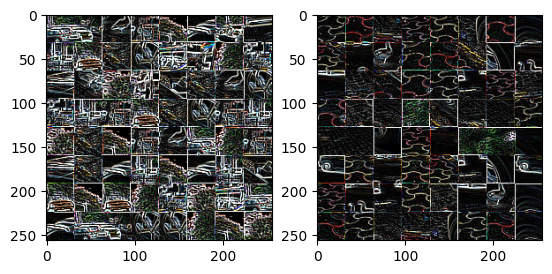

In [88]:
art = f.apply_filter_a(rt)
apt = f.apply_filter_a(pt)
plt.subplot(1,2,1)
plt.imshow(art)
plt.subplot(1,2,2)
plt.imshow(apt)
plt.show()

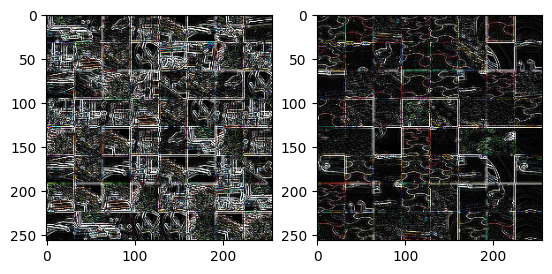

In [89]:
brt = f.apply_filter_b(rt)
bpt = f.apply_filter_b(pt)
plt.subplot(1,2,1)
plt.imshow(brt)
plt.subplot(1,2,2)
plt.imshow(bpt)
plt.show()

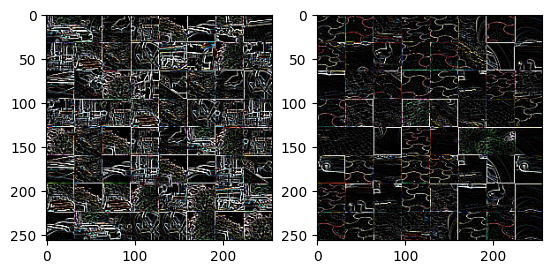

In [90]:
crt = f.apply_filter_c(rt)
cpt = f.apply_filter_c(pt)
plt.subplot(1,2,1)
plt.imshow(crt)
plt.subplot(1,2,2)
plt.imshow(cpt)
plt.show()

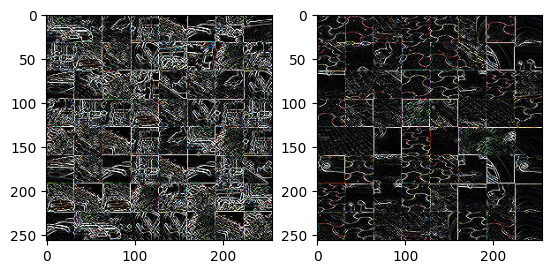

In [91]:
drt = f.apply_filter_d(rt)
dpt = f.apply_filter_d(pt)
plt.subplot(1,2,1)
plt.imshow(drt)
plt.subplot(1,2,2)
plt.imshow(dpt)
plt.show()

### All kernels of this filter add a lot of noise (so filter e will not be used)

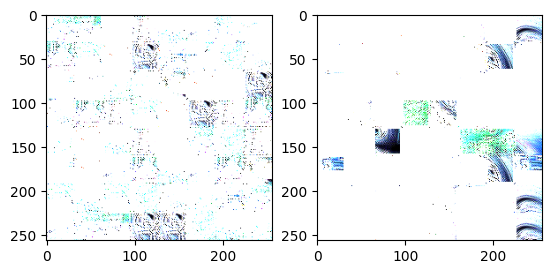

In [92]:
ert = f.apply_filter_e(rt)
ept = f.apply_filter_e(pt)
plt.subplot(1,2,1)
plt.imshow(ert)
plt.subplot(1,2,2)
plt.imshow(ept)
plt.show()

In [93]:
base_filter = [[  1,   2,  -2,   2,   1],
                    [  2,  -6,   8,  -6,   2],
                    [ -2,   8, -12,   8,  -2],
                    [  0,   0,   0,   0,   0],
                    [  0,   0,   0,   0,   0]]
    
f5 = np.asarray([
    base_filter,
    rotate(input=base_filter,angle=90,reshape=False),
    rotate(input=base_filter,angle=180,reshape=False),
    rotate(input=base_filter,angle=-90,reshape=False)
])

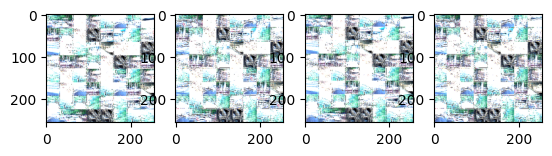

In [94]:
plt.subplot(1,4,1)
plt.imshow(cv2.filter2D(src=rt, kernel=f5[0], ddepth=-1))
plt.subplot(1,4,2)
plt.imshow(cv2.filter2D(src=rt, kernel=f5[1], ddepth=-1))
plt.subplot(1,4,3)
plt.imshow(cv2.filter2D(src=rt, kernel=f5[2], ddepth=-1))
plt.subplot(1,4,4)
plt.imshow(cv2.filter2D(src=rt, kernel=f5[3], ddepth=-1))
plt.show()

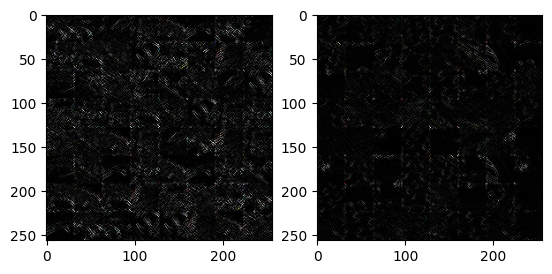

In [95]:
frt = f.apply_filter_f(rt)
fpt = f.apply_filter_f(pt)
plt.subplot(1,2,1)
plt.imshow(frt)
plt.subplot(1,2,2)
plt.imshow(fpt)
plt.show()

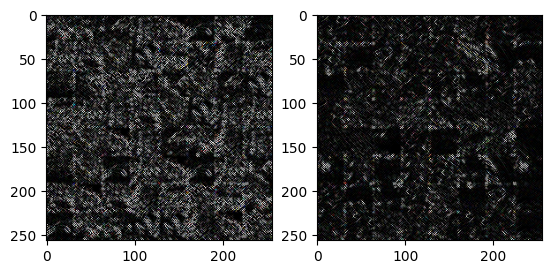

In [96]:
grt = f.apply_filter_g(rt)
gpt = f.apply_filter_g(pt)
plt.subplot(1,2,1)
plt.imshow(grt)
plt.subplot(1,2,2)
plt.imshow(gpt)
plt.show()

In [110]:
path_ai = './test_imgs/AI_SD_ukiyo-e/'
ai_img = os.listdir(path_ai)
ai_img[:2]

['9-250992346-230466.jpg', '9-250992346-255116.jpg']

In [111]:
path_real = './test_imgs/ukiyo_e'
real_img = os.listdir(path_real)
real_img[:2]

['adachi-ginko_114.jpg', 'adachi-ginko_116.jpg']

In [112]:
count = 0

In [167]:
rt,pt = smash_n_reconstruct(input_path=os.path.join(path_real,real_img[count]))

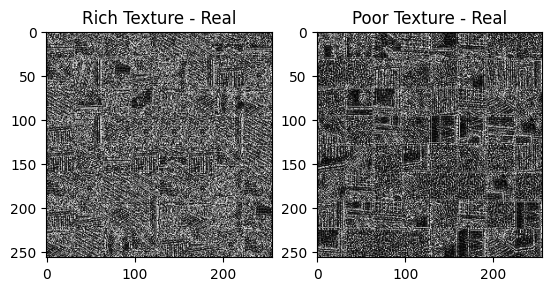

In [168]:
nrt = f.apply_all_filters(rt)
npt = f.apply_all_filters(pt)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(nrt,code=cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title('Rich Texture - Real')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(npt,code=cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title('Poor Texture - Real')
plt.show()

In [169]:
rt,pt = smash_n_reconstruct(input_path=os.path.join(path_ai,ai_img[count]))

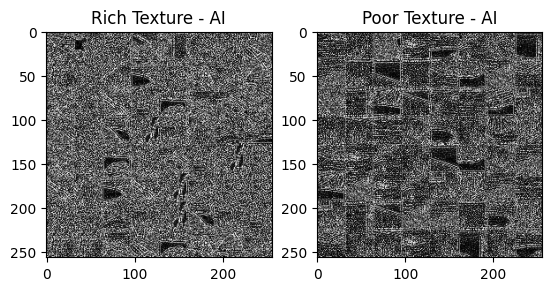

In [170]:
nrt = f.apply_all_filters(rt)
npt = f.apply_all_filters(pt)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(nrt,code=cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title('Rich Texture - AI')
plt.subplot(1,2,2)
plt.title('Poor Texture - AI')
plt.imshow(cv2.cvtColor(npt,code=cv2.COLOR_RGB2GRAY),cmap='gray')
plt.show()

In [166]:
count+=1
gc.collect()

17595